## Neural Network (NN) Model with Hyperparamter Tuning using Keras Tuner

In [ ]:
# !pip install numpy pandas tensorflow scikit-learn matplotlib seaborn scipy scikeras keras-tuner

### Preparing features to fit into NN Model + Saving StandardScaler, OHE, TFIDF

In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
import joblib
import os

train = pd.read_parquet('train_dataset.parquet')
test = pd.read_parquet('test_dataset.parquet')

# Define feature types
numerical_features = ['published_month', 'tagCount']
categorical_features = ['published_dayOfWeek', 'categoryId']
text_features = ['title', 'channelTitle', 'tags', 'description']

# Target variables
target_features = ['popularity_class']

output_dir = 'trained_models'  
os.makedirs(output_dir, exist_ok=True)  # Create the sub-directory 

# Process and combine features for training
print("Processing features...")
def process_features(train_df, test_df):
    # --- NUMERICAL FEATURES ---
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(train_df[numerical_features])
    X_test_num = scaler.transform(test_df[numerical_features])

    # Save the fitted scaler
    scaler_file_path = os.path.join(output_dir, 'scaler.pkl')
    joblib.dump(scaler, scaler_file_path)

    # --- CATEGORICAL FEATURES ---
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_train_cat = ohe.fit_transform(train_df[categorical_features])
    X_test_cat = ohe.transform(test_df[categorical_features])

    # Save the fitted OneHotEncoder
    ohe_file_path = os.path.join(output_dir, 'ohe.pkl')
    joblib.dump(ohe, ohe_file_path)

    # --- TEXT FEATURES ---
    # Combine all text columns into one
    def combine_text(df):
        return df[text_features].fillna('').astype(str).agg(' '.join, axis=1)

    train_text_combined = combine_text(train_df)
    test_text_combined = combine_text(test_df)

    tfidf = TfidfVectorizer(max_features=500, stop_words='english')
    X_train_text = tfidf.fit_transform(train_text_combined).toarray()
    X_test_text = tfidf.transform(test_text_combined).toarray()

    # Save the fitted TfidfVectorizer
    tfidf_file_path = os.path.join(output_dir, 'tfidf.pkl')
    joblib.dump(tfidf, tfidf_file_path)

    # --- COMBINE ALL ---
    X_train = np.hstack([X_train_num, X_train_cat, X_train_text])
    X_test = np.hstack([X_test_num, X_test_cat, X_test_text])

    return X_train, X_test

X_train, X_test = process_features(train, test)

y_train = train[target_features].values.astype(np.float32)
y_test = test[target_features].values.astype(np.float32)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

input_dim = X_train.shape[1]
print(f"Input dimension: {input_dim}")

y_train_class = y_train.flatten().astype(int)
y_test_class = y_test.flatten().astype(int)

Processing features...
Input dimension: 524


### Building Model with Hyperparamter Tuning

Trial 30 Complete [00h 00m 55s]
val_accuracy: 0.6098369359970093

Best val_accuracy So Far: 0.650669515132904
Total elapsed time: 00h 19m 52s

Best hyperparameters:
units_layer1: 512
activation: relu
batch_norm_1: False
dropout_rate1: 0.6
units_layer2: 160
batch_norm_2: False
dropout_rate2: 0.30000000000000004
units_layer3: 80
batch_norm_3: False
dropout_rate3: 0.4
units_layer4: 56
batch_size: 16
learning_rate: 0.0022342365914000857
Epoch 1/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5245 - loss: 0.9889 - val_accuracy: 0.5983 - val_loss: 0.8626
Epoch 2/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5850 - loss: 0.8830 - val_accuracy: 0.5979 - val_loss: 0.8458
Epoch 3/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6128 - loss: 0.8361 - val_accuracy: 0.6203 - val_loss: 0.8414
Epoch 4/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6268 - loss: 0.8123 - val_accuracy: 0.6174 - val_loss: 0.8253
Epoch 5/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 4

/Users/cedricyee/Documents/IS3107/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cedricyee/Documents/IS3107/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cedricyee/Documents/IS3107/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

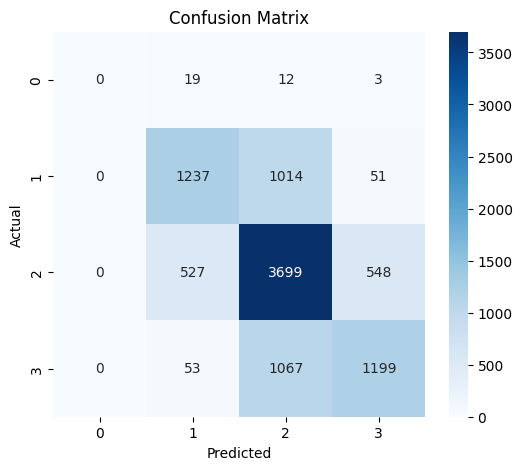

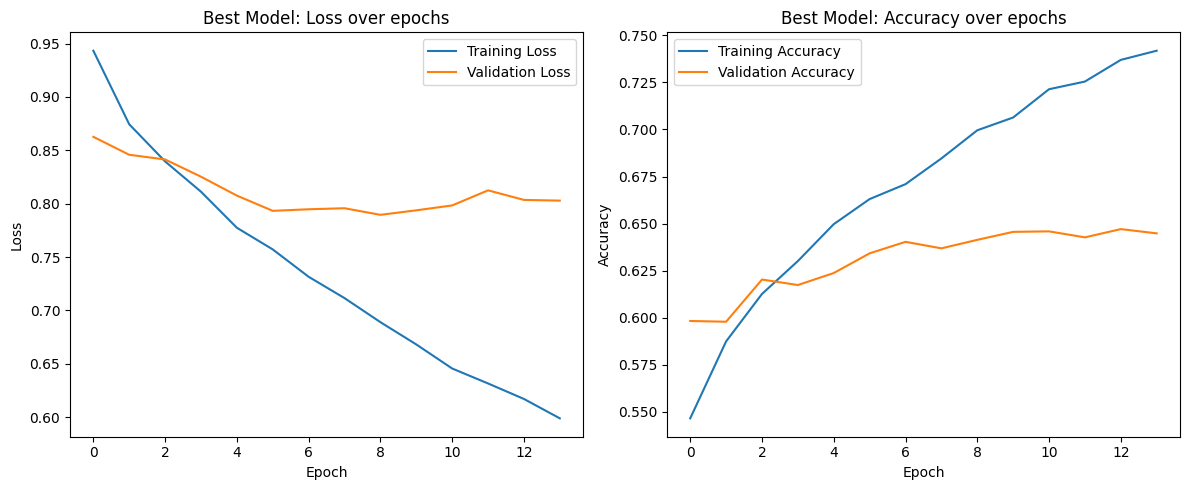


Training baseline model for comparison...
Epoch 1/50


/Users/cedricyee/Documents/IS3107/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4548 - loss: 1.1794 - val_accuracy: 0.5593 - val_loss: 0.9203
Epoch 2/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5409 - loss: 0.9500 - val_accuracy: 0.5845 - val_loss: 0.8744
Epoch 3/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5767 - loss: 0.8904 - val_accuracy: 0.6043 - val_loss: 0.8474
Epoch 4/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5942 - loss: 0.8621 - val_accuracy: 0.6098 - val_loss: 0.8329
Epoch 5/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6067 - loss: 0.8346 - val_accuracy: 0.6147 - val_loss: 0.8239
Epoch 6/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6312 - loss: 0.8006 - val_accuracy: 0.6261 - val_loss: 0.8130
Epoch 7/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6380 - loss: 0.7925 - val_accuracy: 0.6257 - val_loss: 0.8066
Epoch 8/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6450 - loss: 0.7671 - val_accuracy: 0.6268 - val_

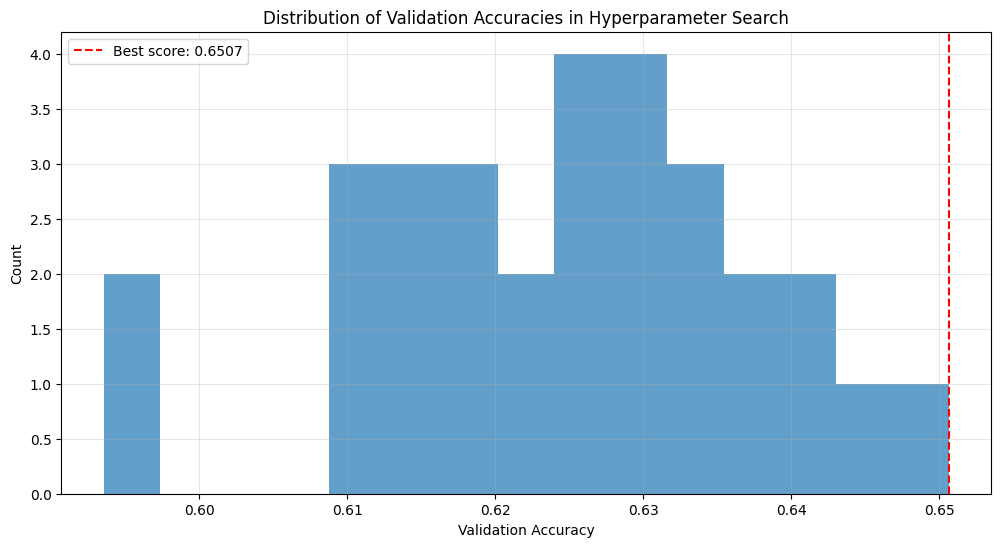

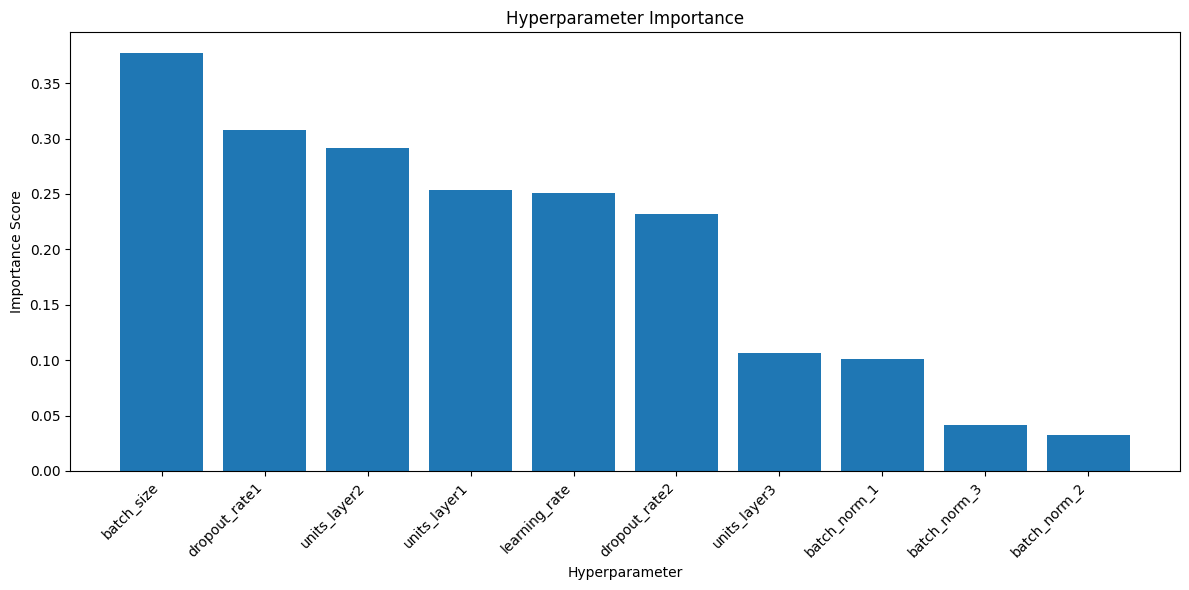

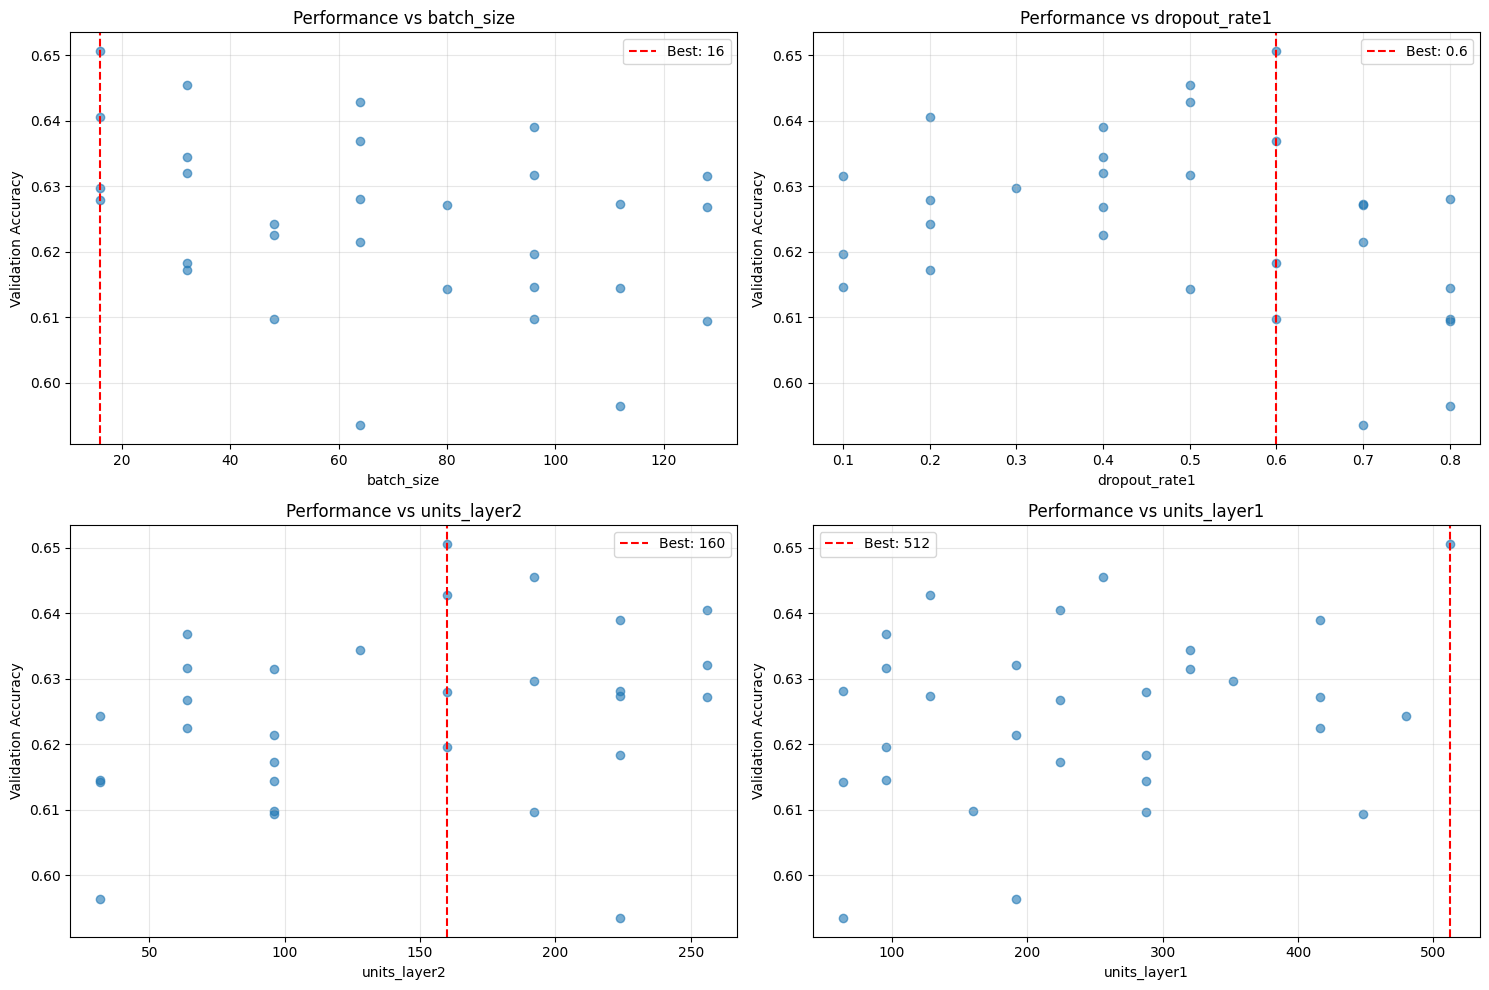

In [ ]:
# Define model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # First layer 
    units_layer1 = hp.Int('units_layer1', min_value=64, max_value=512, step=32)
    model.add(Dense(units_layer1, input_shape=(input_dim,), activation=hp.Choice('activation', values=['relu', 'elu', 'selu'])))
    
    # Optional batch normalization
    if hp.Boolean('batch_norm_1'):
        model.add(BatchNormalization())
    
    # Dropout rate 
    dropout_rate1 = hp.Float('dropout_rate1', min_value=0.1, max_value=0.8, step=0.1)
    model.add(Dropout(dropout_rate1))
    
    # Second layer
    units_layer2 = hp.Int('units_layer2', min_value=32, max_value=256, step=32)
    model.add(Dense(units_layer2, activation=hp.Choice('activation', values=['relu', 'elu', 'selu'])))
    
    if hp.Boolean('batch_norm_2'):
        model.add(BatchNormalization())
    
    dropout_rate2 = hp.Float('dropout_rate2', min_value=0.1, max_value=0.7, step=0.1)
    model.add(Dropout(dropout_rate2))
    
    # Third layer
    units_layer3 = hp.Int('units_layer3', min_value=16, max_value=128, step=16)
    model.add(Dense(units_layer3, activation=hp.Choice('activation', values=['relu', 'elu', 'selu'])))
    
    if hp.Boolean('batch_norm_3'):
        model.add(BatchNormalization())
    
    dropout_rate3 = hp.Float('dropout_rate3', min_value=0.1, max_value=0.6, step=0.1)
    model.add(Dropout(dropout_rate3))
    
    # Fourth layer
    units_layer4 = hp.Int('units_layer4', min_value=8, max_value=64, step=8)
    model.add(Dense(units_layer4, activation=hp.Choice('activation', values=['relu', 'elu', 'selu'])))
    
    # Output layer
    model.add(Dense(4, activation='softmax'))  # 4 Popularity classes

    # Batch Size tuning
    hp.Int('batch_size', min_value=16, max_value=128, step=16)
    
    # Compile model with tunable learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Initialise Keras Tuner for Hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30, 
    executions_per_trial=1,  
    directory='keras_tuner_dir',
    project_name='youtube_popularity'
)

tuner.search_space_summary()

tuner.search(
    X_train, y_train_class,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(1)[0]

print("\nBest hyperparameters:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Get optimal batch size
batch_size = best_hps.get('batch_size')
if batch_size is None: 
    batch_size = 32

history = best_model.fit(
    X_train, y_train_class,
    epochs=50,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Predict classes
y_pred_probs = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Evaluation
acc = accuracy_score(y_test_class, y_pred_classes)
print(f'\nTest accuracy with best model: {acc:.4f}\n')

print("Classification Report:")
print(classification_report(y_test_class, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Best Model: Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best Model: Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Comparison with baseline model (original hyperparameters)
print("\nTraining baseline model for comparison...")
baseline_model = Sequential([
    Dense(256, input_shape=(input_dim,), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 Popularity classes
])

baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

baseline_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

baseline_history = baseline_model.fit(
    X_train, y_train_class,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[baseline_early_stopping]
)

baseline_preds = baseline_model.predict(X_test)
baseline_classes = np.argmax(baseline_preds, axis=1)
baseline_acc = accuracy_score(y_test_class, baseline_classes)

print(f'\nBaseline model accuracy: {baseline_acc:.4f}')
print(f'Tuned model accuracy: {acc:.4f}')
print(f'Improvement: {(acc - baseline_acc) * 100:.2f}%')

# Visualise trial results
plt.figure(figsize=(12, 6))
trial_scores = []
for trial in tuner.oracle.trials.values():
    if trial.score is not None:  
        trial_scores.append(trial.score)

plt.hist(trial_scores, bins=15, alpha=0.7)
plt.axvline(max(trial_scores), color='red', linestyle='--', 
            label=f'Best score: {max(trial_scores):.4f}')
plt.title('Distribution of Validation Accuracies in Hyperparameter Search')
plt.xlabel('Validation Accuracy')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()





### Hyperparamter Tuning Results Statistics

Optimal hyperparameters (found through tuning):<br>
units_layer1: 512<br>
activation: relu<br>
batch_norm_1: False<br>
dropout_rate1: 0.6<br>
units_layer2: 160<br>
batch_norm_2: False<br>
dropout_rate2: 0.30000000000000004<br>
units_layer3: 80<br>
batch_norm_3: False<br>
dropout_rate3: 0.4<br>
units_layer4: 56<br>
batch_size: 16<br>
learning_rate: 0.0022342365914000857<br><br>

Baseline hyperparamters:<br>
units_layer1: 256<br>
activation: relu<br>
batch_norm_1: True<br>
dropout_rate1: 0.5<br>
units_layer2: 128<br>
batch_norm_2: True<br>
dropout_rate2: 0.4<br>
units_layer3: 64<br>
batch_norm_3: True<br>
dropout_rate3: 0.3<br>
units_layer4: 32<br>
batch_size: 32<br>
learning_rate: 0.001<br><br>

Baseline model accuracy: 0.6476<br>
Tuned model accuracy: 0.6507<br>
Improvement: 0.31%<br>


### Evaluation of Tuning Results

The tuned model slightly outperformed the baseline, achieving a test accuracy of 65.07% compared to 64.76%. The optimal configuration favored a larger and deeper architecture, higher dropout rates, and no batch normalization, suggesting that increased regularisation and a smaller batch size (16 vs. 32) were beneficial in this case. The learning rate was also doubled, which may have contributed to faster convergence during training.

Although the improvement over the baseline was modest (only 0.31%), the tuning process allowed for a systematic exploration of the hyperparameter space, rather than relying on a fixed, pre-determined set of values, which is difficult to tell whether a given model's performance is truly optimal. Venturing into hyperparameter tuning enables comparison of different combinations of hyperparameters. ensuring the eventual selected configuration is closer to optimality for the task.

### Saving the NN Model

In [11]:
model_file_path = os.path.join(output_dir, 'tuned_NN_model.h5')
best_model.save(model_file_path)

In [7]:
from tensorflow.keras.models import load_model

loaded_model = load_model('tuned_NN_model.h5')
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       268,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 160)            │        82,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 80)             │        12,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 56)             │         4,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           228 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,526 (1.41 MB)

 Trainable params: 368,524 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)